In [22]:
import os
import numpy as np

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten

In [24]:
count = 0
dirs = os.listdir('CnnProject\Images')
for dir in dirs:
    files = list(os.listdir('CnnProject/Images/'+dir))
    print(dir + ' Folder has ' + str(len(files)) + ' Images')
    count = count + len(files)
print('Image Folder has ' + str(count) + ' Images')


daisy Folder has 764 Images
sunflower Folder has 733 Images
tulip Folder has 984 Images
Image Folder has 2481 Images


In [25]:
base_dir = 'CnnProject/Images/'
img_size = 180
batch = 32

In [26]:
train_ds = tf.keras.utils.image_dataset_from_directory(base_dir,
                                                       seed = 123,
                                                       validation_split = 0.2,
                                                       subset = 'training',
                                                       image_size = (img_size, img_size),
                                                       batch_size = batch)
val_ds = tf.keras.utils.image_dataset_from_directory(base_dir,
                                                       seed = 123,
                                                       validation_split = 0.2,
                                                       subset = 'validation',
                                                       image_size = (img_size, img_size),
                                                       batch_size = batch)

Found 2481 files belonging to 3 classes.
Using 1985 files for training.
Found 2481 files belonging to 3 classes.
Using 496 files for validation.


In [27]:
flower_names = train_ds.class_names
flower_names

['daisy', 'sunflower', 'tulip']

In [28]:
import matplotlib.pyplot as plt
import tensorflow as tf

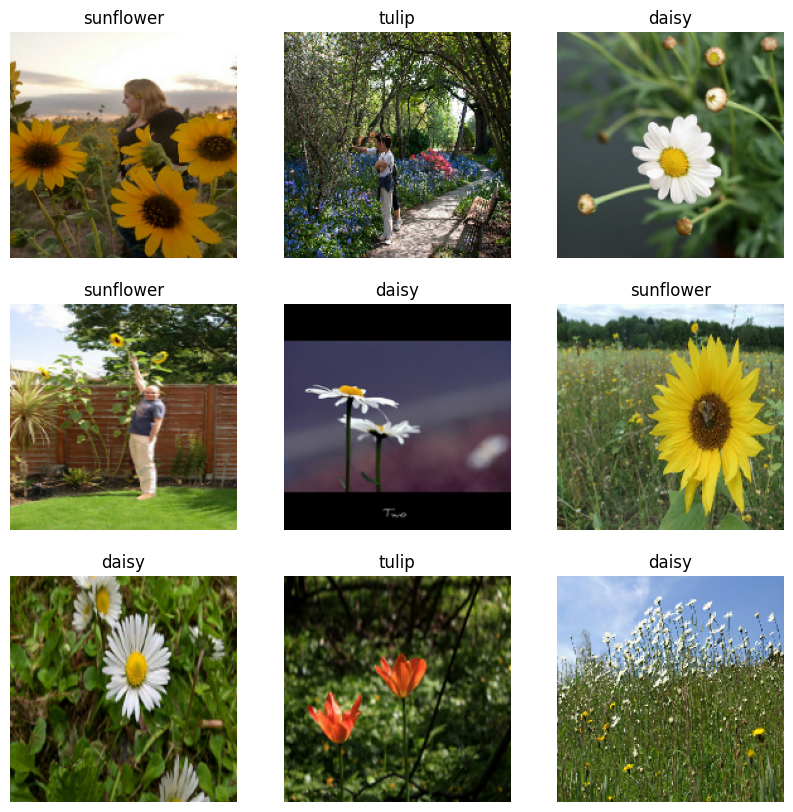

In [29]:
i = 0
plt.figure(figsize=(10,10))

for images, labels in train_ds.take(1):
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(flower_names[labels[i]])
        plt.axis("off")

In [30]:
AUTOTUNE = tf.data.AUTOTUNE

In [31]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = AUTOTUNE)

In [32]:
val_ds = val_ds.cache().prefetch(buffer_size = AUTOTUNE)

In [33]:
data_augmentation = Sequential([
    layers.RandomFlip("horizontal", input_shape = (img_size, img_size, 3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)  
])

In [12]:
# i = 0
# plt.figure(figsize=(10, 10))

# for images, labels in train_ds.take(1):
#     for i in range(9):
#         augmented_images = []
#         for image in images:
#             augmented_image = tf.image.random_flip_left_right(image)
#             augmented_image = tf.image.rot90(augmented_image, k=tf.random.uniform(shape=[], minval=0, maxval=4, dtype=tf.int32))
#             augmented_image = tf.image.central_crop(augmented_image, central_fraction=tf.random.uniform(shape=[], minval=0.9, maxval=1.0))
#             augmented_images.append(augmented_image)
        
#         augmented_images = tf.stack(augmented_images)
        
#         plt.subplot(3, 3, i + 1)
#         plt.imshow(augmented_images[i].numpy().astype("uint8"))
#         plt.axis("off")

InvalidArgumentError: {{function_node __wrapped__Pack_N_10_device_/job:localhost/replica:0/task:0/device:CPU:0}} Shapes of all inputs must match: values[0].shape = [168,168,3] != values[1].shape = [180,180,3] [Op:Pack] name: stack

<Figure size 1000x1000 with 0 Axes>

In [34]:
model = Sequential([
    data_augmentation,
    layers.Rescaling(1./255),
    Conv2D(16, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(3)
])

In [35]:
model.compile(optimizer='adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [36]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_2 (Sequential)       │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_1 (Rescaling)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [37]:
history = model.fit(train_ds, epochs = 45, validation_data=val_ds)

Epoch 1/45
63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 188ms/step - accuracy: 0.4342 - loss: 1.4368 - val_accuracy: 0.7117 - val_loss: 0.6804
Epoch 2/45
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 223ms/step - accuracy: 0.7465 - loss: 0.6682 - val_accuracy: 0.7661 - val_loss: 0.6007
Epoch 3/45
63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 233ms/step - accuracy: 0.7641 - loss: 0.6099 - val_accuracy: 0.7702 - val_loss: 0.5801
Epoch 4/45
63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 240ms/step - accuracy: 0.7947 - loss: 0.5437 - val_accuracy: 0.7802 - val_loss: 0.5857
Epoch 5/45
63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 231ms/step - accuracy: 0.7734 - loss: 0.5689 - val_accuracy: 0.8065 - val_loss: 0.5213
Epoch 6/45
63/63 ━━━━━━━━━━━━━━━━━━━━ 16s 253ms/step - accuracy: 0.8011 - loss: 0.5073 - val_accuracy: 0.8165 - val_loss: 0.4957
Epoch 7/45
63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 238ms/step - accuracy: 0.8279 - loss: 0.4917 - val_accuracy: 0.8266 - val_loss: 0.4589
Epoch 8/45
63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 245ms/step - accuracy: 0.8276 - loss: 0.4482 - val_accu

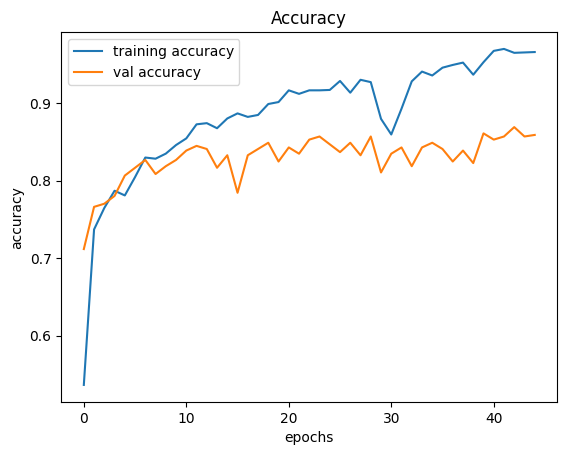

In [38]:
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

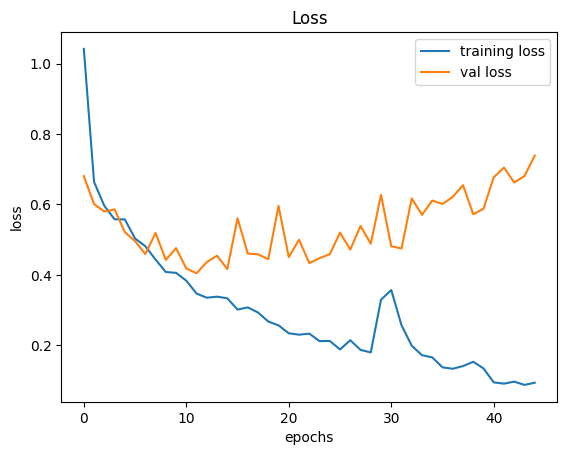

In [39]:
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [40]:
def classify_images(image_path):
    input_image = tf.keras.utils.load_img(image_path, target_size = (180, 180))
    input_image_array = tf.keras.utils.img_to_array(input_image)
    input_image_exp_dim = tf.expand_dims(input_image_array, 0)

    predictions = model.predict(input_image_exp_dim)
    result = tf.nn.softmax(predictions[0])
    outcome = "Bức ảnh này là của " + flower_names[np.argmax(result)] + " với độ chính xác " + str(np.max(result)*100)
    return outcome

In [41]:
classify_images('CnnProject\Sample\HoaHuongDuong.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


'Bức ảnh này là của sunflower với độ chính xác 99.99535083770752'

In [42]:
from keras.models import load_model

In [43]:
model.save('PhanLoaiHoa.keras')